# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd

# load the data using pandas
sat_scores = pd.read_csv("../data/sat.csv")
act_scores = pd.read_csv("../data/act.csv")

##### 2. Print the first ten rows of each dataframe.

In [2]:
# print the first ten rows using head()
# first ten rows of sat scores
sat_scores.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


In [3]:
# first ten rows of act scores
act_scores.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


##### 3. Describe in words what each variable (column) is.

**sat.csv**

* Unnamed : Index
* State : States that tests were taken
* Participation :
* Evidence-Based Reading and Writing : Evidence-Based Reading socres
* Math : Math scores
* Total : Total scores


**act.csv**

* Unnamed : Index
* State : States that tests were taken
* Participation :
* English : English scores
* Math : Math scores
* Reading : Reading Scores
* Science : Science Scores
* Composite : Total Scores

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [4]:
# to check the stats
sat_scores.describe()
# to check the datatypes
sat_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [5]:
# to check stats
act_scores.describe()
# to check the datatypes
sat_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


min value of Math (52) in SAT doesn't make sense (Maryland).
min value of Science (2.3) in ACT doens't make sense (Maryland).
Participation should be float or integer type not object type.
Unnamed 0 columns should be removed. ACT data has national variable which needs to be deleted.


##### 5. Print the types of each column.

In [6]:
# df.dtypes
sat_scores.dtypes

Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [7]:
act_scores.dtypes

Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [8]:
# remove '%' from the string and change the type of columns to float from object
sat_scores['Participation'] = sat_scores['Participation'].str.replace('%','').astype(float)
act_scores['Participation'] = act_scores['Participation'].str.replace('%','').astype(float)

# remove "Unnamed: 0" columns in each dataset
sat_scores.drop(['Unnamed: 0'], axis = 1, inplace = True)
act_scores.drop(['Unnamed: 0'], axis = 1, inplace = True)

# remove "national" row in act_scores
act_scores.drop([0], inplace = True) 


In [9]:
sat_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [10]:
# create dictionaries using dict() and zip()
sat_ebrw = dict(zip(sat_scores['State'], sat_scores['Evidence-Based Reading and Writing']))
sat_math = dict(zip(sat_scores['State'], sat_scores['Math']))
sat_total = dict(zip(sat_scores['State'], sat_scores['Total']))

act_eng = dict(zip(act_scores['State'], act_scores['English']))
act_math = dict(zip(act_scores['State'], act_scores['Math']))
act_read = dict(zip(act_scores['State'], act_scores['Reading']))
act_sci = dict(zip(act_scores['State'], act_scores['Science']))
act_comp = dict(zip(act_scores['State'], act_scores['Composite']))

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [11]:

sat_dict = sat_scores.to_dict('list')
act_dict = act_scores.to_dict('list')

# create one dictionary where each key is the column name (for both SAT and ACT scores) and each value is an iterable list
# create an empty dictionary
sat_act_dict = {}

# merge the empty dictionary with SAT score then ACT score
sat_act_dict.update(sat_dict)
sat_act_dict.update(act_dict)

##### 9. Merge the dataframes on the state column.

In [12]:
# create a merged dataframes using pd.merge()
merged = pd.merge(sat_scores, act_scores, on = 'State')

##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [13]:
# Change the names of the columns to distinguish between the SAT and the ACT
merged.rename(index = str, columns = {"Participation_x": "SAT Participation",
                                      "Math_x": "SAT Math",
                                      "Evidence-Based Reading and Writing": "SAT English",
                                      "Total": "SAT Total",
                                      "English": "ACT English",
                                      "Reading": "ACT Reading",
                                      "Science": "ACT Science",
                                      "Composite": "ACT Total",
                                      "Participation_y": "ACT Participation",
                                      "Math_y": "ACT Math"}, inplace = True)

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [14]:
# print max, min of each columns except 'State'
print(merged.loc[:, merged.columns != 'State'].min())
print(merged.loc[:, merged.columns != 'State'].max())

SAT Participation      2.0
SAT English          482.0
SAT Math              52.0
SAT Total            950.0
ACT Participation      8.0
ACT English           16.3
ACT Math              18.0
ACT Reading           18.1
ACT Science            2.3
ACT Total             17.8
dtype: float64
SAT Participation     100.0
SAT English           644.0
SAT Math              651.0
SAT Total            1295.0
ACT Participation     100.0
ACT English            25.5
ACT Math               25.3
ACT Reading            26.0
ACT Science            24.9
ACT Total              25.5
dtype: float64


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [15]:
def get_std(numbers):
    # average of numbers inside the list (mu)
    avg = numbers.mean()
    
    return (sum([(num - avg) ** 2 for num in numbers]) / len(numbers)) ** 0.5

# get standard devations of each column except 'State'
sd = [get_std(merged[col]) for col in merged.columns[1:]]

# insert 'sd' in the first of the sd list, so the list would fit into the pd data frame as a row
sd.insert(0,'SD')
sd

['SD',
 34.92907076664508,
 45.21697020437866,
 84.07255521608297,
 91.58351056778743,
 31.824175751231806,
 2.3304876369363363,
 1.9624620273436781,
 2.0469029314842646,
 3.151107895464408,
 2.000786081581989]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [16]:
# add sd list into the last row of merged dataset
merged.loc[len(merged)] = sd

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [17]:
# returns a sorted dataframe by the values in a given column
def sort_merged(column_name):
    return merged.sort_values(by=[column_name], ascending = False)

# observations descending by SAT Participation rate
sort_merged('SAT Participation')
    

,State,SAT Participation,SAT English,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Total
22,Michigan,100.000000,509.00000,495.000000,1005.000000,29.000000,24.100000,23.700000,24.500000,23.800000,24.100000
6,Connecticut,100.000000,530.00000,512.000000,1041.000000,31.000000,25.500000,24.600000,25.600000,24.600000,25.200000
7,Delaware,100.000000,503.00000,492.000000,996.000000,18.000000,24.100000,23.400000,24.800000,23.600000,24.100000
8,District of Columbia,100.000000,482.00000,468.000000,950.000000,32.000000,24.400000,23.500000,24.900000,23.500000,24.200000
29,New Hampshire,96.000000,532.00000,520.000000,1052.000000,18.000000,25.400000,25.100000,26.000000,24.900000,25.500000
19,Maine,95.000000,513.00000,499.000000,1012.000000,8.000000,24.200000,24.000000,24.800000,23.700000,24.300000
12,Idaho,93.000000,513.00000,493.000000,1005.000000,38.000000,21.900000,21.800000,23.000000,22.100000,22.300000
9,Florida,83.000000,520.00000,497.000000,1017.000000,73.000000,19.000000,19.400000,21.000000,19.400000,19.800000
21,Massachusetts,76.000000,555.00000,551.000000,1107.000000,29.000000,25.400000,25.300000,25.900000,24.700000,25.400000
39,Rhode Island,71.000000,539.00000,524.000000,1062.000000,21.000000,24.000000,23.300000,24.700000,23.400000,24.000000


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [18]:
# returns a sorted dataframe with a score above a certain threshold
# if num > 0, return rate > num, else return rate < num (below given rate)
def bool_filter(column_name, num):
    if num > 0:
        return merged[merged[column_name] > num]
    else:
        return merged[merged[column_name] < -num]

# display only states with SAT participation rate above 50%
bool_filter('SAT Participation', 50)


,State,SAT Participation,SAT English,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Total
4,California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,22.8
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,25.2
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,24.2
9,Florida,83.0,520.0,497.0,1017.0,73.0,19.0,19.4,21.0,19.4,19.8
10,Georgia,61.0,535.0,515.0,1050.0,55.0,21.0,20.9,22.0,21.3,21.4
11,Hawaii,55.0,544.0,541.0,1085.0,90.0,17.8,19.2,19.2,19.3,19.0
12,Idaho,93.0,513.0,493.0,1005.0,38.0,21.9,21.8,23.0,22.1,22.3
14,Indiana,63.0,542.0,532.0,1074.0,35.0,22.0,22.4,23.2,22.3,22.6
19,Maine,95.0,513.0,499.0,1012.0,8.0,24.2,24.0,24.8,23.7,24.3


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# hide warnings when creating graphs
import warnings
warnings.filterwarnings('ignore') 

# set seaborn style
sns.set(style="white", palette="muted", color_codes=True)

f, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(sat_scores['Participation'], ax = axes[0]).set_title("SAT Participation rate");
sns.distplot(act_scores['Participation'], ax = axes[1]).set_title("ACT Participation rate");

plt.show()


<Figure size 1000x500 with 2 Axes>

##### 17. Plot the Math(s) distributions from both data sets.

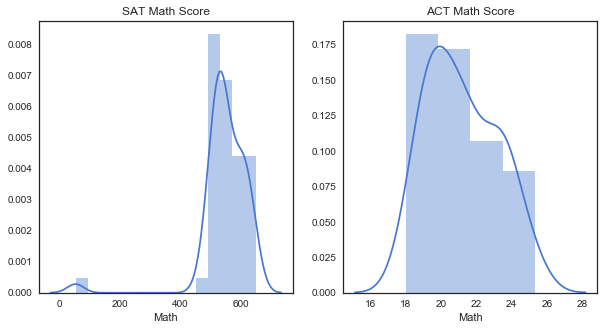

In [20]:
f, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(sat_scores['Math'], ax = axes[0]).set_title("SAT Math Score");
sns.distplot(act_scores['Math'], ax = axes[1]).set_title("ACT Math Score");

plt.show()

##### 18. Plot the Verbal distributions from both data sets.

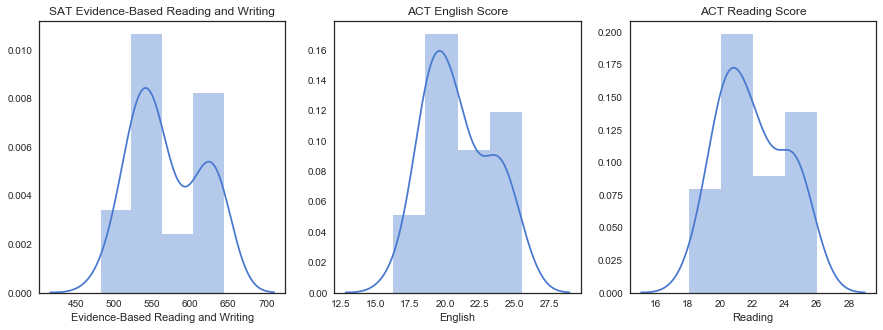

In [21]:
f, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.distplot(sat_scores['Evidence-Based Reading and Writing'], ax = axes[0]).set_title("SAT Evidence-Based Reading and Writing");
sns.distplot(act_scores['English'], ax = axes[1]).set_title("ACT English Score");
sns.distplot(act_scores['Reading'], ax = axes[2]).set_title("ACT Reading Score");

plt.show()

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

The data are normally distributed.

##### 20. Does this assumption hold true for any of our columns? Which?

No. None of columns from two dataset is normally distributed.

##### 21. Plot some scatterplots examining relationships between all variables.

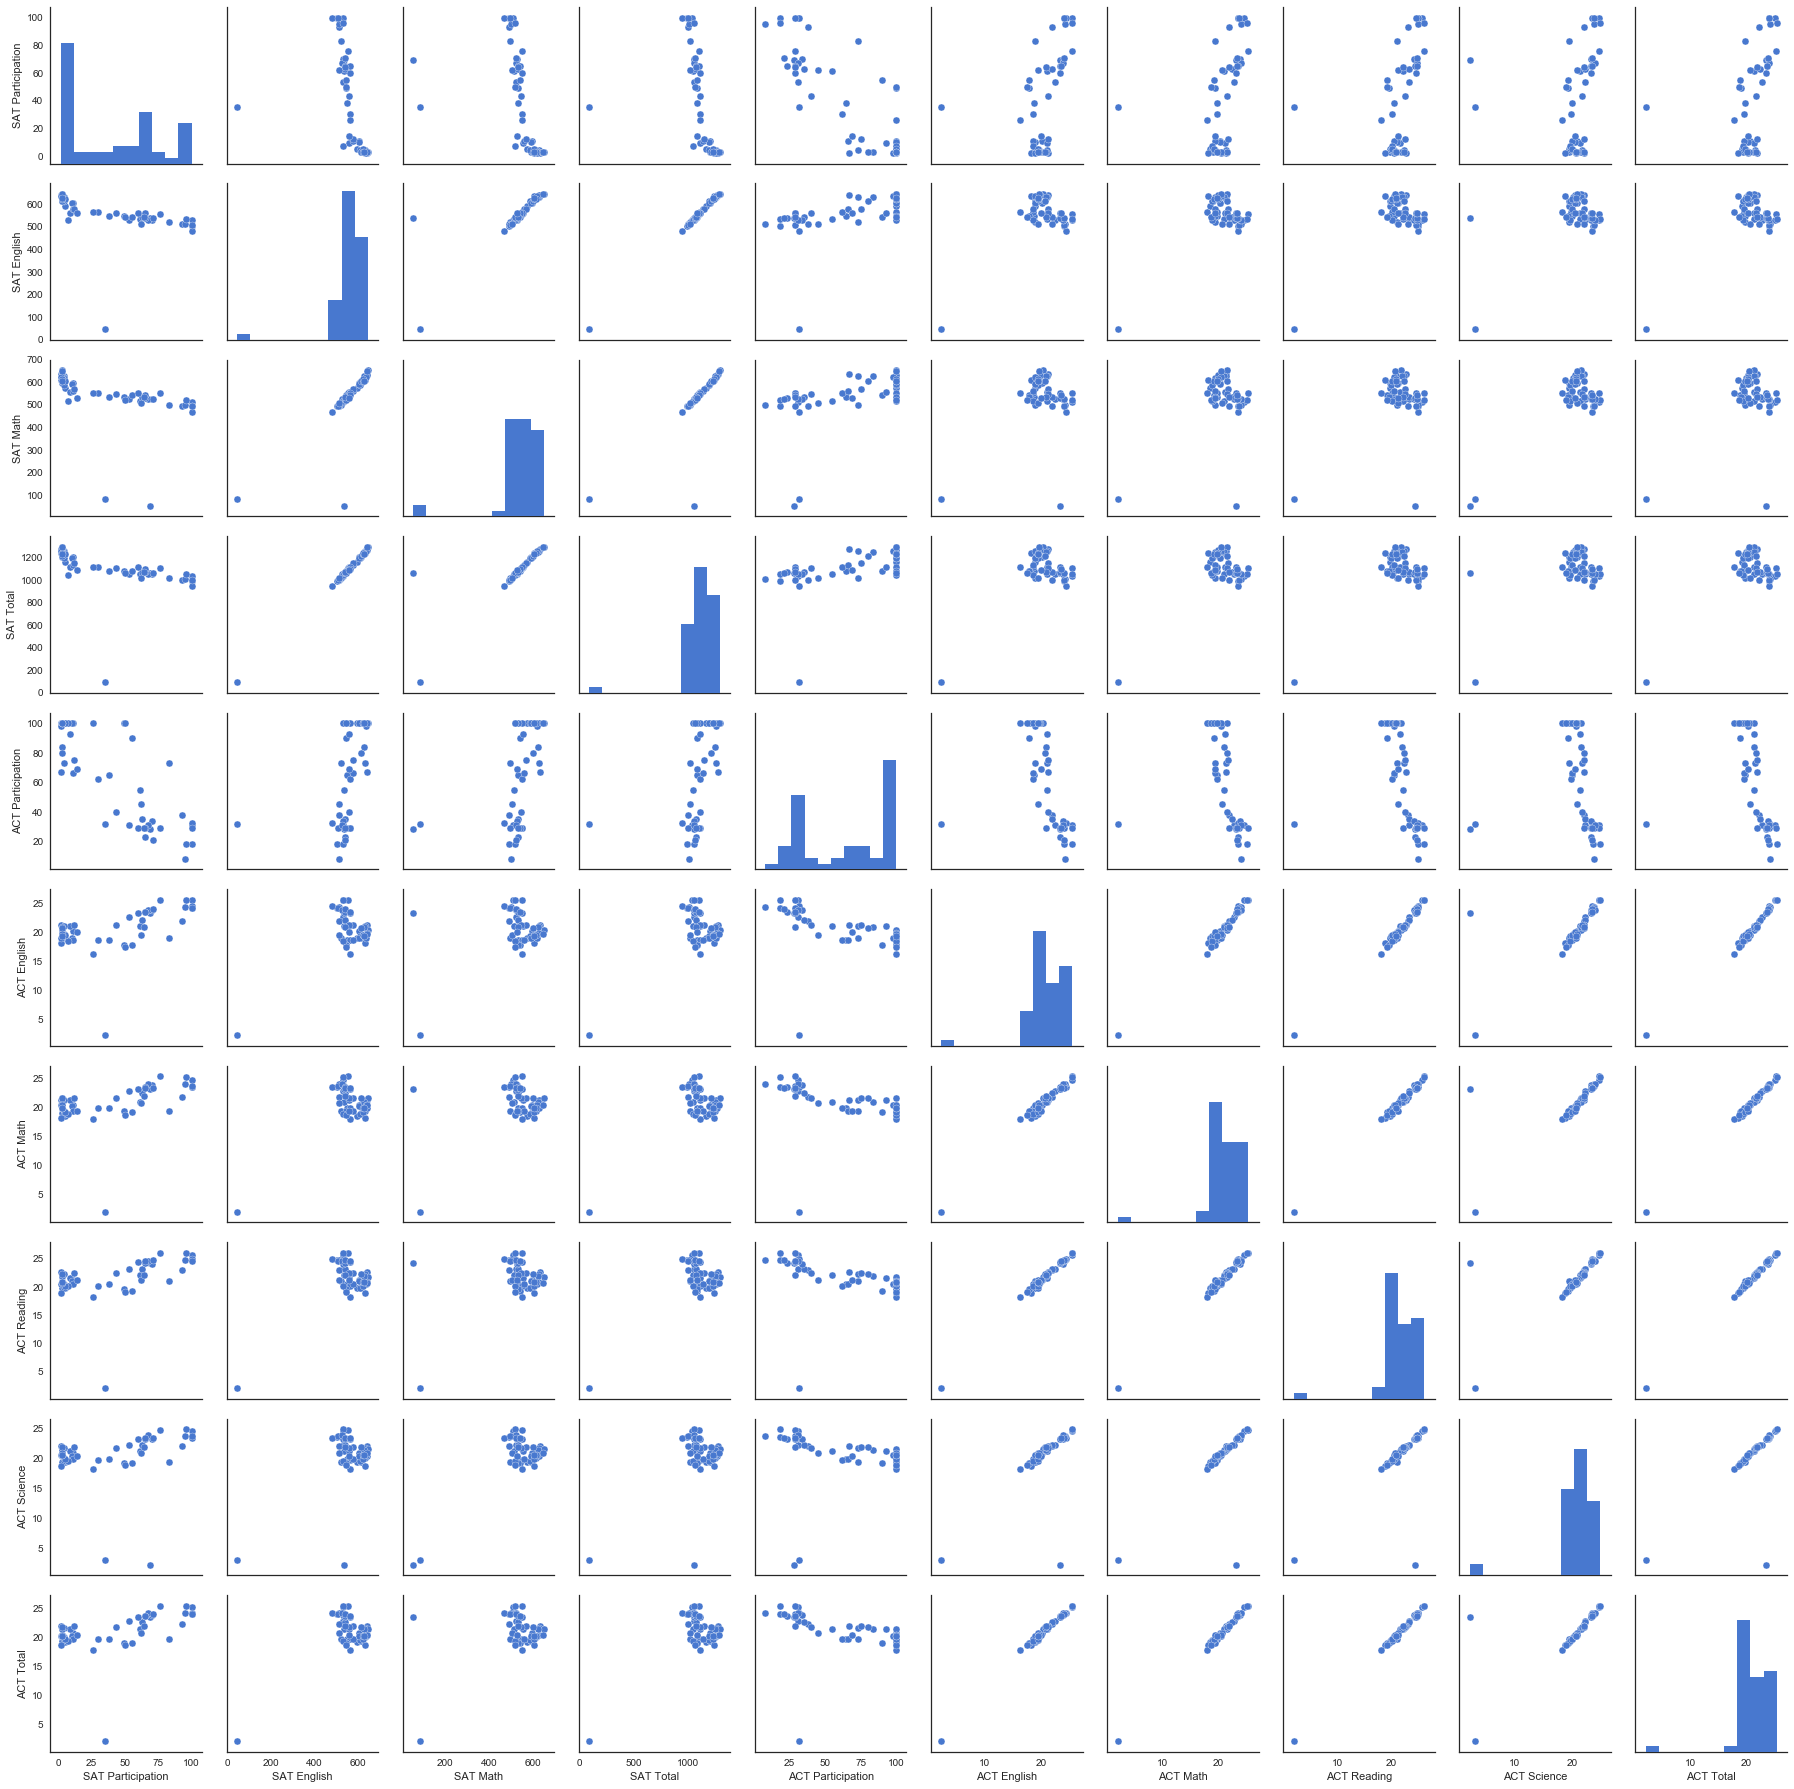

In [22]:
sns.pairplot(merged)

##### 22. Are there any interesting relationships to note?

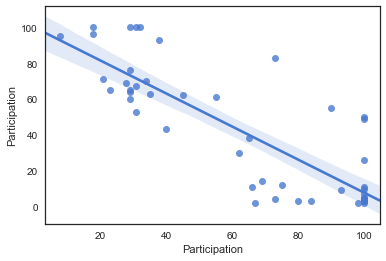

In [23]:
sns.regplot(act_scores['Participation'], sat_scores['Participation'])

Unsurprsingly, the total scores of each tests have positive realationship versus each subjects. 
There's a negative realtionship rate between SAT Participation against ACT Participation rate which is surprising, because I thought that taking one or another test would not effect so much since students can take both if they want.

##### 23. Create box plots for each variable. 

Text(0.5, 1.0, 'ACT Scores')

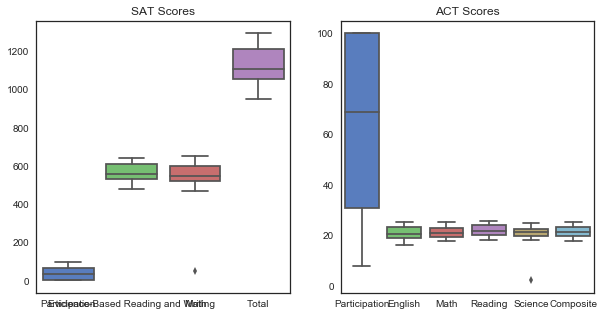

In [24]:
f, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data = sat_scores, ax = axes[0]).set_title("SAT Scores")
sns.boxplot(data = act_scores, ax = axes[1]).set_title("ACT Scores")

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

https://public.tableau.com/profile/steve.lee4745#!/vizhome/SAT_Scores/Sheet1?publish=yes

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

Center, spread, and shape.

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [25]:

import scipy.stats as stats

result = stats.ttest_ind(sat_scores['Participation'], act_scores['Participation'])
result.statistic, result.pvalue

(-3.8085778908170544, 0.00024134203698662353)

Since p-value < 0.05, there are statistically significant difference between ACT and SAT participation rates. 

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [26]:
z = 1.96  # for 95%
ci_lower = np.mean(sat_scores['Participation']) - z * get_std(sat_scores['Participation'])
ci_upper = np.mean(sat_scores['Participation']) + z * get_std(sat_scores['Participation'])
print("SAT CI:", ci_lower, ci_upper)

z = 1.96  # for 95%
ci_lower = np.mean(act_scores['Participation']) - z * get_std(act_scores['Participation'])
ci_upper = np.mean(act_scores['Participation']) + z * get_std(act_scores['Participation'])
print("ACT CI:", ci_lower, ci_upper)

SAT CI: -28.657057133996908 108.2649002712518
ACT CI: 2.87951748836997 127.63028643319865


##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

No, because the score ranges of SAT and ACT differ.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

Yes. Because they have a negative correlation and the p-value rejects null. 

In [27]:
# additional codes to get the number of states that part. rate < 20
bool_filter('SAT Participation', -20)
len(bool_filter('SAT Participation', -20))

23

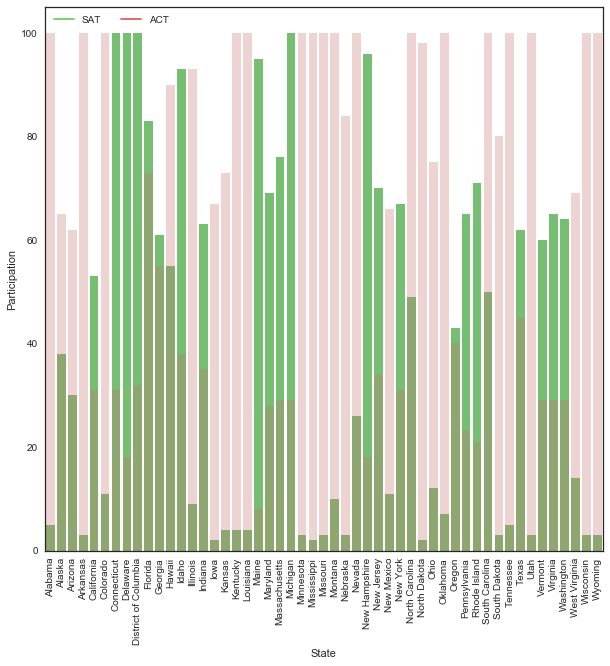

In [28]:
from matplotlib.lines import Line2D
# plot participation rate vs state
f, axes = plt.subplots(figsize = (10,10))
sns.barplot(sat_scores['State'], sat_scores['Participation'], color = 'g')
sns.barplot(act_scores['State'], act_scores['Participation'], color = 'r', alpha = 0.3)
plt.xticks(rotation = 90)
legend_elements = [Line2D([0], [0], color='g', label='SAT'),
                   Line2D([0], [0], color='r', label='ACT')]
plt.legend(handles=legend_elements, loc = "upper left", ncol = 2)
